Matplotlib is building the font cache; this may take a moment.


|--- AssetType_FX <= 0.50
|   |--- BuyCurrency_USD <= 0.50
|   |   |--- BuyCurrency_JPY <= 0.50
|   |   |   |--- class: Rates
|   |   |--- BuyCurrency_JPY >  0.50
|   |   |   |--- class: Credits
|   |--- BuyCurrency_USD >  0.50
|   |   |--- class: Equity
|--- AssetType_FX >  0.50
|   |--- class: FX



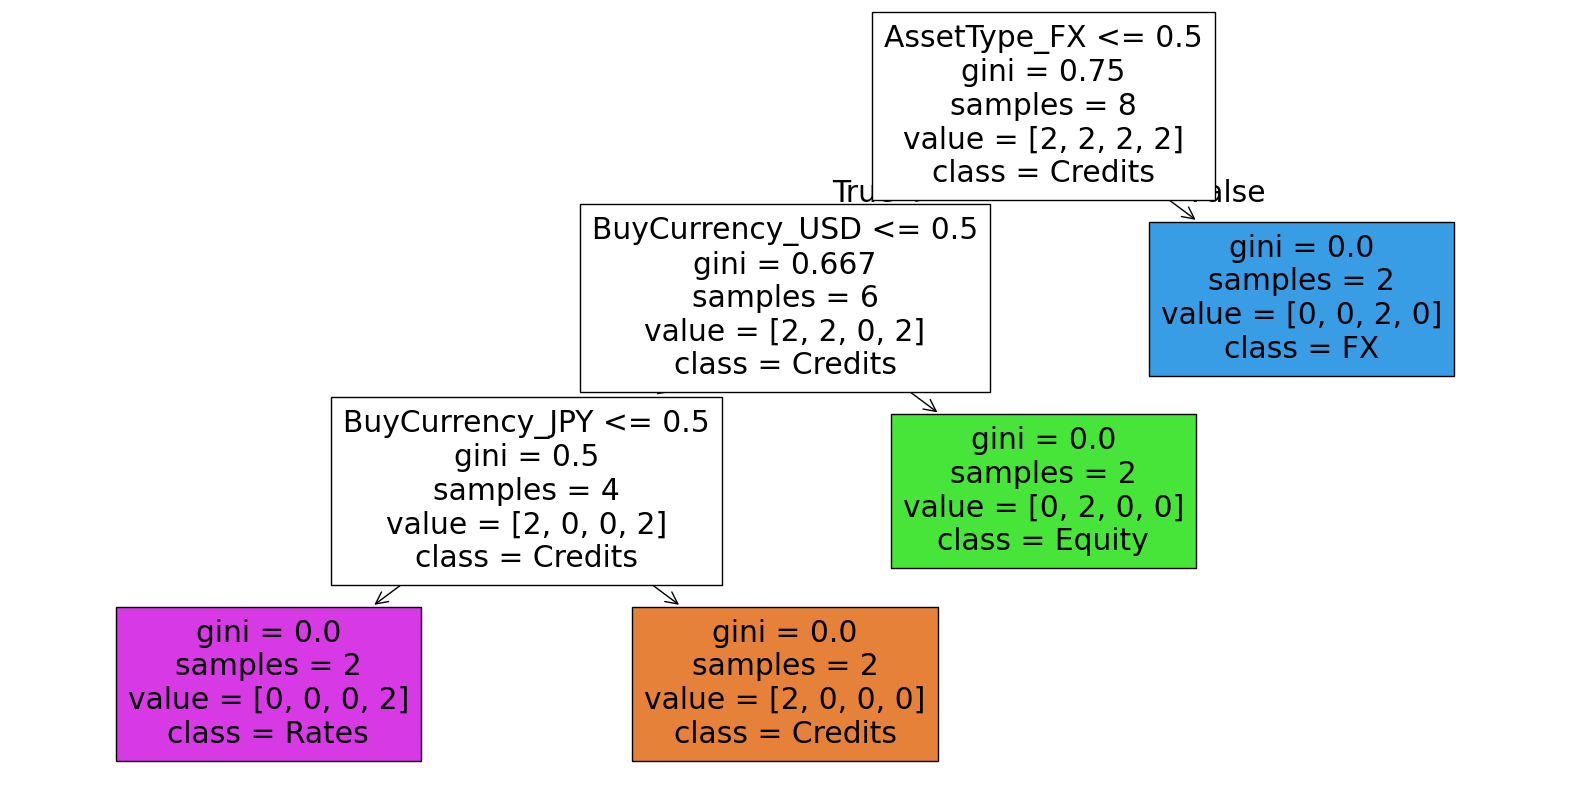

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# Example dataset creation
data = {
    'AssetType': ['Equity', 'Rates', 'Credits', 'FX', 'Equity', 'Rates', 'Credits', 'FX'],
    'BuyCurrency': ['USD', 'EUR', 'JPY', 'GBP', 'USD', 'EUR', 'JPY', 'GBP'],
    'SellCurrency': ['EUR', 'USD', 'USD', 'USD', 'JPY', 'GBP', 'EUR', 'USD'],
    'Days': [1, 2, 3, 4, 1, 2, 3, 4],
    'PFE': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

# Create DataFrame
df = pd.DataFrame(data)

# One-hot encode the categorical features
categorical_features = ['AssetType', 'BuyCurrency', 'SellCurrency']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine all features
final_features_df = pd.concat([df[['Days', 'PFE']], encoded_df], axis=1)

# Define features and target
X = final_features_df
y = df['AssetType']

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_model.fit(X, y)

# Export the tree as text
tree_rules = export_text(tree_model, feature_names=final_features_df.columns.to_list())
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=final_features_df.columns, class_names=tree_model.classes_, filled=True)
plt.show()


|--- Days <= 1.50
|   |--- class: Equity
|--- Days >  1.50
|   |--- Volume <= 1750.00
|   |   |--- class: Rates
|   |--- Volume >  1750.00
|   |   |--- AssetType_Credits <= 0.50
|   |   |   |--- AssetType_FX <= 0.50
|   |   |   |   |--- AssetType_Derivative <= 0.50
|   |   |   |   |   |--- class: Bond
|   |   |   |   |--- AssetType_Derivative >  0.50
|   |   |   |   |   |--- class: Derivative
|   |   |   |--- AssetType_FX >  0.50
|   |   |   |   |--- class: FX
|   |   |--- AssetType_Credits >  0.50
|   |   |   |--- class: Credits



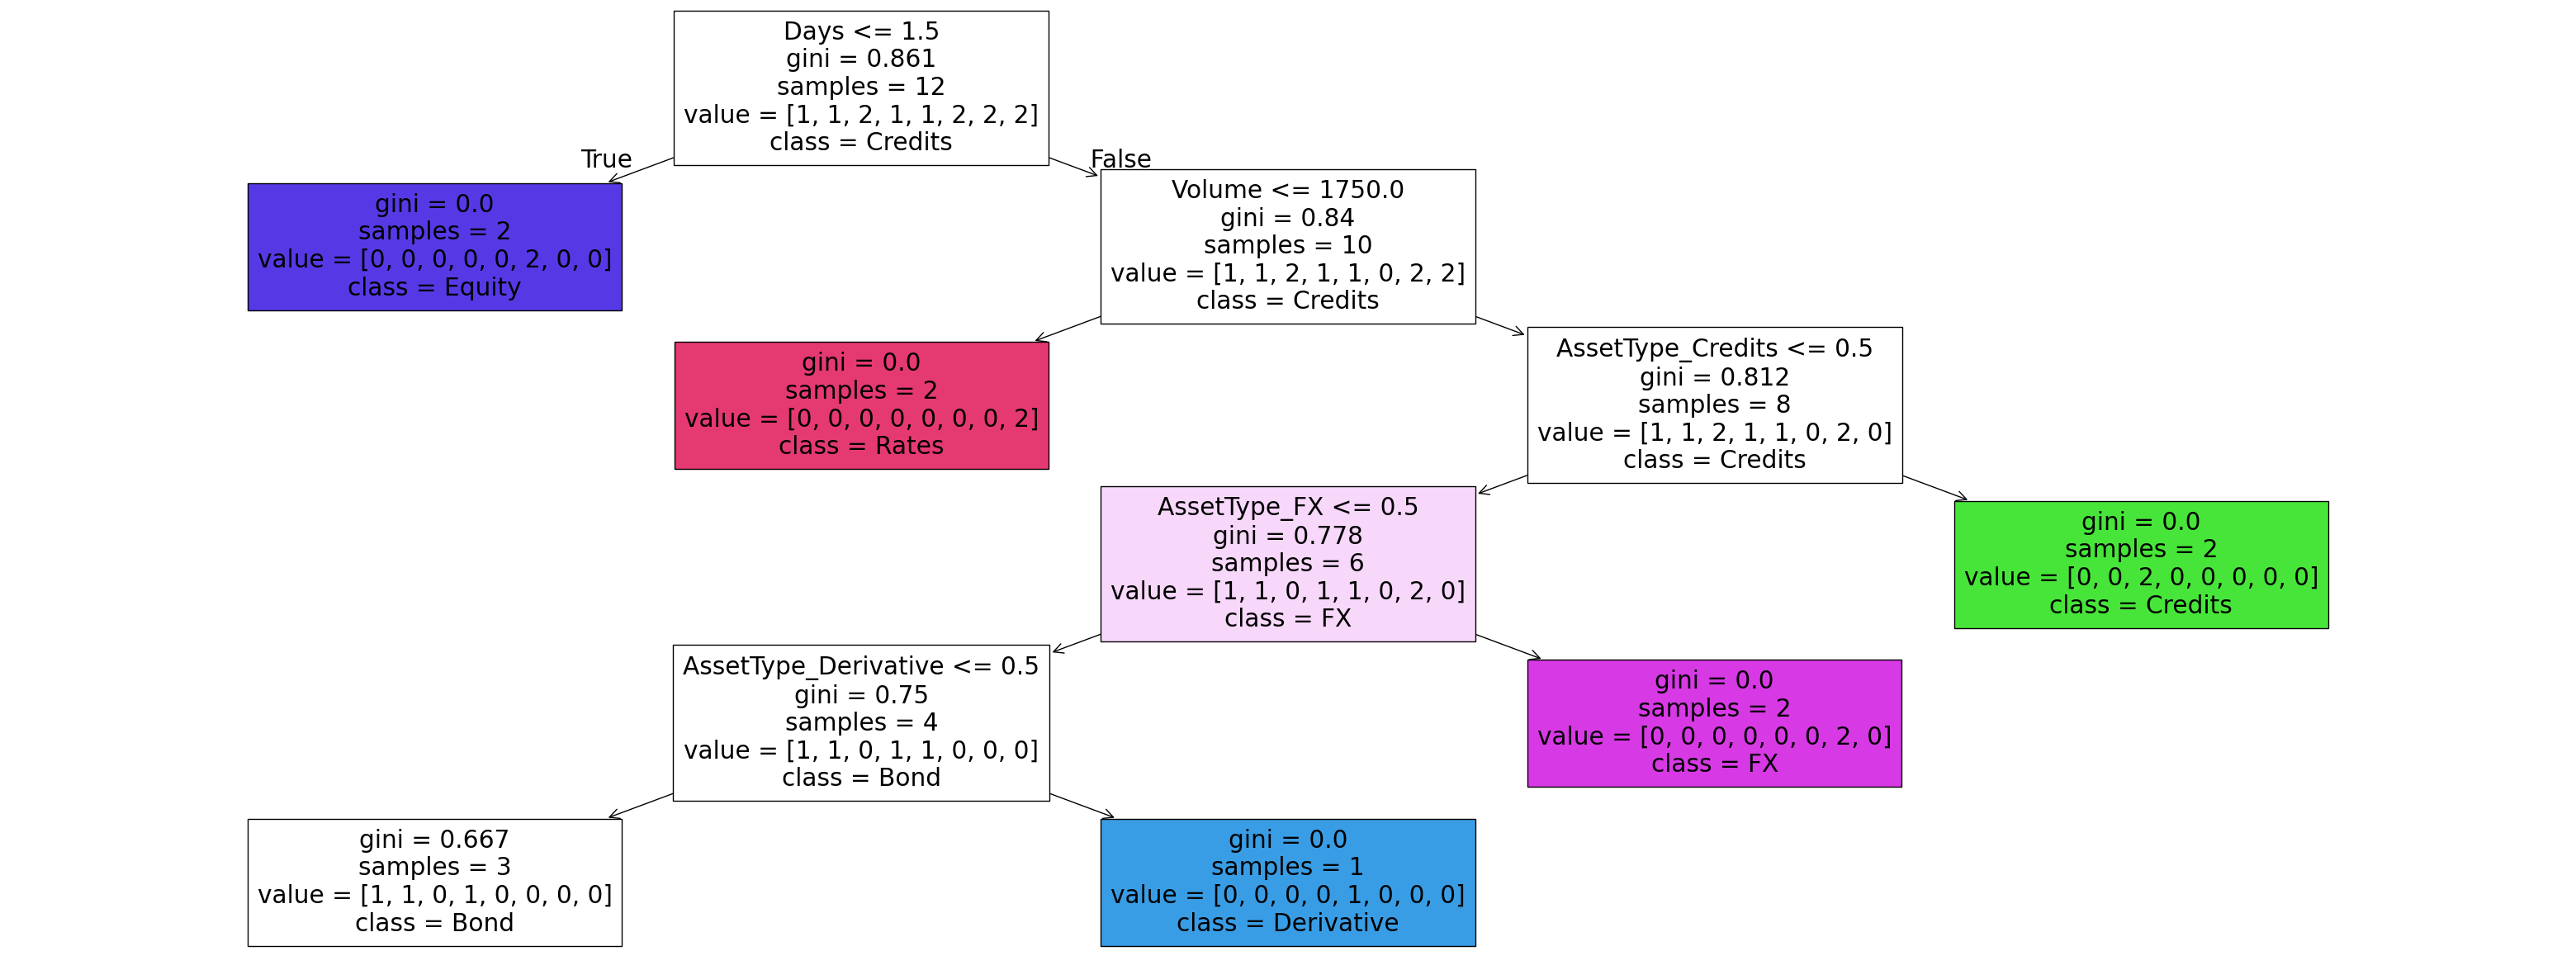

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# Example expanded dataset creation
data = {
    'AssetType': ['Equity', 'Rates', 'Credits', 'FX', 'Equity', 'Rates', 'Credits', 'FX', 
                  'Commodity', 'Derivative', 'Bond', 'Currency'],
    'BuyCurrency': ['USD', 'EUR', 'JPY', 'GBP', 'USD', 'EUR', 'JPY', 'GBP', 
                    'USD', 'EUR', 'JPY', 'GBP'],
    'SellCurrency': ['EUR', 'USD', 'USD', 'USD', 'JPY', 'GBP', 'EUR', 'USD', 
                     'EUR', 'USD', 'USD', 'USD'],
    'Days': [1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 7, 8],
    'PFE': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2],
    'Volume': [1000, 1500, 2000, 2500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500],
    'RiskRating': [5, 3, 1, 4, 2, 5, 3, 2, 1, 2, 3, 4],
    'TradeType': ['Spot', 'Forward', 'Swap', 'Option', 'Spot', 'Forward', 'Swap', 'Option', 
                  'Spot', 'Forward', 'Swap', 'Option']
}

# Create DataFrame
df = pd.DataFrame(data)

# One-hot encode the categorical features
categorical_features = ['AssetType', 'BuyCurrency', 'SellCurrency', 'TradeType']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine all features
final_features_df = pd.concat([df[['Days', 'PFE', 'Volume', 'RiskRating']], encoded_df], axis=1)

# Define features and target
X = final_features_df
y = df['AssetType']

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_model.fit(X, y)

# Export the tree as text
tree_rules = export_text(tree_model, feature_names=final_features_df.columns.to_list())
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(40, 15))
tree.plot_tree(tree_model, feature_names=final_features_df.columns, class_names=tree_model.classes_, filled=True)
plt.show()


|--- AssetType_Commodity <= 0.50
|   |--- AssetType_Credits <= 0.50
|   |   |--- AssetType_FX <= 0.50
|   |   |   |--- AssetType_Equity <= 0.50
|   |   |   |   |--- AssetType_Rates <= 0.50
|   |   |   |   |   |--- AssetType_Currency <= 0.50
|   |   |   |   |   |   |--- AssetType_Derivative <= 0.50
|   |   |   |   |   |   |   |--- class: Bond
|   |   |   |   |   |   |--- AssetType_Derivative >  0.50
|   |   |   |   |   |   |   |--- class: Derivative
|   |   |   |   |   |--- AssetType_Currency >  0.50
|   |   |   |   |   |   |--- class: Currency
|   |   |   |   |--- AssetType_Rates >  0.50
|   |   |   |   |   |--- class: Rates
|   |   |   |--- AssetType_Equity >  0.50
|   |   |   |   |--- class: Equity
|   |   |--- AssetType_FX >  0.50
|   |   |   |--- class: FX
|   |--- AssetType_Credits >  0.50
|   |   |--- class: Credits
|--- AssetType_Commodity >  0.50
|   |--- class: Commodity



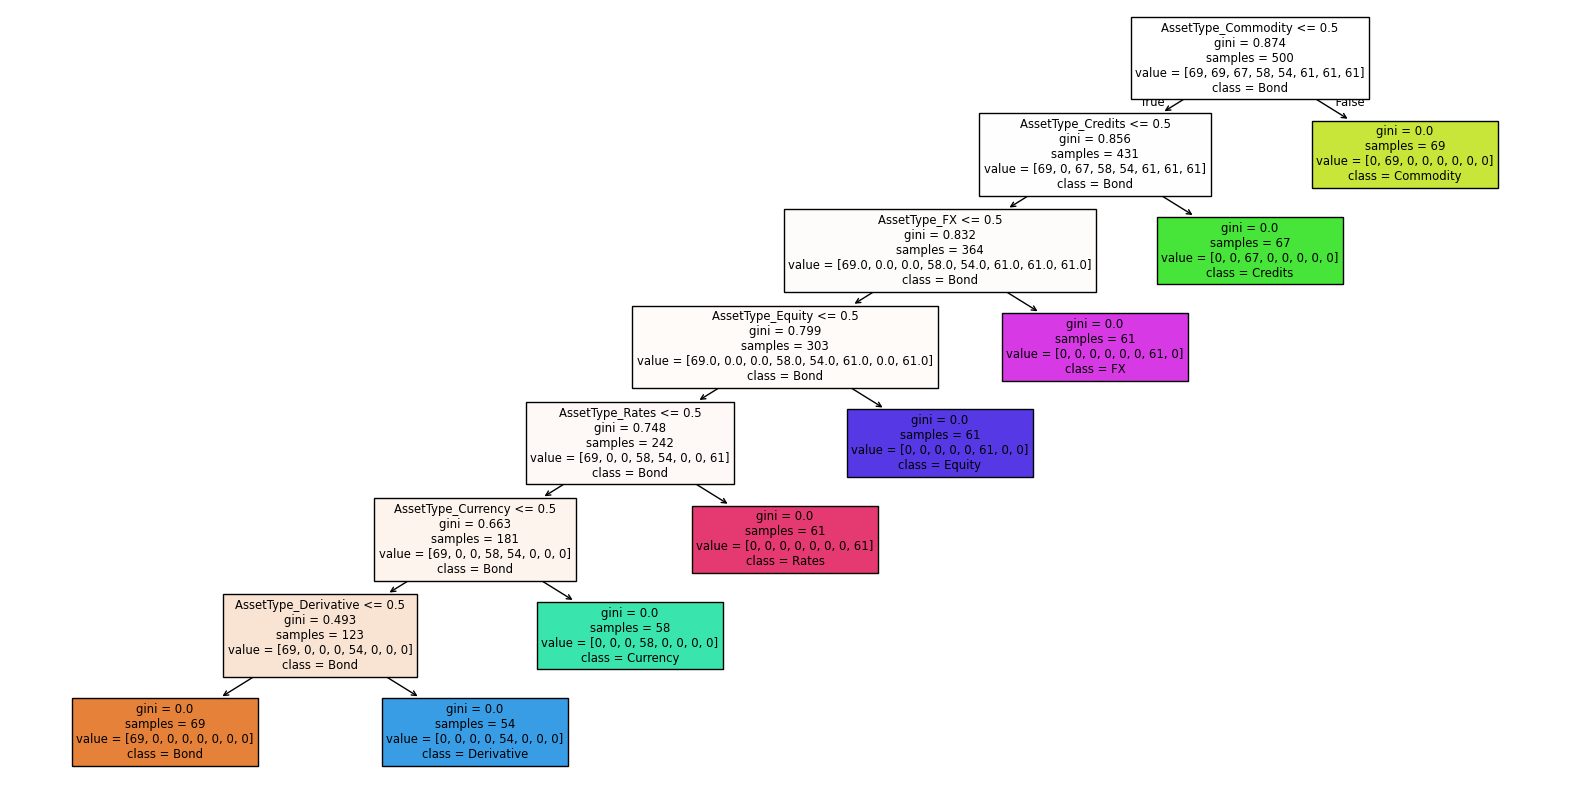

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree
from faker import Faker
from random import randint, choice
from datetime import datetime, timedelta

# Initialize Faker
fake = Faker()

# Sample data generation
trader_ids = [fake.random_number(digits=6) for _ in range(10)]
companies = [fake.company() for _ in range(10)]
buy_currencies = ['USD', 'EUR', 'JPY', 'GBP']
sell_currencies = ['EUR', 'USD', 'USD', 'USD']

data = []
for _ in range(500):  # Generate 500 sample records
    buy_currency = choice(buy_currencies)
    sell_currency = choice(sell_currencies)
    spot_rate = round(fake.pyfloat(min_value=0.5, max_value=1.5), 4)
    forward_rate = round(spot_rate + fake.pyfloat(min_value=-0.05, max_value=0.05), 4)
    buy_sell_indicator = choice(['Buy', 'Sell'])
    quantity = round(fake.pyfloat(min_value=1000, max_value=1000000), 2)
    asset_type = choice(['Equity', 'Rates', 'Credits', 'FX', 'Commodity', 'Derivative', 'Bond', 'Currency'])
    
    data.append({
        'TransactionID': fake.unique.random_number(digits=8),
        'TradingDate': fake.date_between(start_date='-1y', end_date='today'),
        'MaturityDate': fake.date_between(start_date='today', end_date='+1y'),
        'ExecutionTime': (datetime.now()-timedelta(seconds=randint(1,86400))).strftime('%H:%M:%S'),
        'InstrumentID': fake.random_number(digits=12),
        'TraderID': choice(trader_ids),
        'BuyCurrency': buy_currency,
        'SellCurrency': sell_currency,
        'SpotRate': spot_rate,
        'ForwardRate': forward_rate,
        'BuySellIndicator': buy_sell_indicator,
        'BuyNotional': round(quantity, 2),
        'SellNotional': round(quantity * spot_rate, 2),
        'Counterparty': choice(companies),
        'Days': randint(1, 365),
        'PFE': round(fake.pyfloat(min_value=0.1, max_value=1.2), 4),
        'Volume': randint(1000, 5000),
        'RiskRating': randint(1, 5),
        'TradeType': choice(['Spot', 'Forward', 'Swap', 'Option']),
        'AssetType': asset_type
    })

# Create DataFrame
df = pd.DataFrame(data)

# One-hot encode the categorical features
categorical_features = ['BuyCurrency', 'SellCurrency', 'BuySellIndicator', 'Counterparty', 'TradeType', 'AssetType']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine all features
final_features_df = pd.concat([df[['Days', 'PFE', 'Volume', 'RiskRating', 'SpotRate', 'ForwardRate', 'BuyNotional', 'SellNotional']], encoded_df], axis=1)

# Define features and target
X = final_features_df
y = df['AssetType']

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0, max_depth=10)  # Increase max_depth for more decisions
tree_model.fit(X, y)

# Export the tree as text
tree_rules = export_text(tree_model, feature_names=final_features_df.columns.to_list())
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=final_features_df.columns, class_names=tree_model.classes_, filled=True)
plt.show()


|--- AssetType_Equity <= 0.50
|   |--- AssetType_Credits <= 0.50
|   |   |--- AssetType_Commodity <= 0.50
|   |   |   |--- AssetType_FX <= 0.50
|   |   |   |   |--- AssetType_Rates <= 0.50
|   |   |   |   |   |--- AssetType_Currency <= 0.50
|   |   |   |   |   |   |--- AssetType_Derivative <= 0.50
|   |   |   |   |   |   |   |--- class: Bond
|   |   |   |   |   |   |--- AssetType_Derivative >  0.50
|   |   |   |   |   |   |   |--- class: Derivative
|   |   |   |   |   |--- AssetType_Currency >  0.50
|   |   |   |   |   |   |--- class: Currency
|   |   |   |   |--- AssetType_Rates >  0.50
|   |   |   |   |   |--- class: Rates
|   |   |   |--- AssetType_FX >  0.50
|   |   |   |   |--- class: FX
|   |   |--- AssetType_Commodity >  0.50
|   |   |   |--- class: Commodity
|   |--- AssetType_Credits >  0.50
|   |   |--- class: Credits
|--- AssetType_Equity >  0.50
|   |--- class: Equity



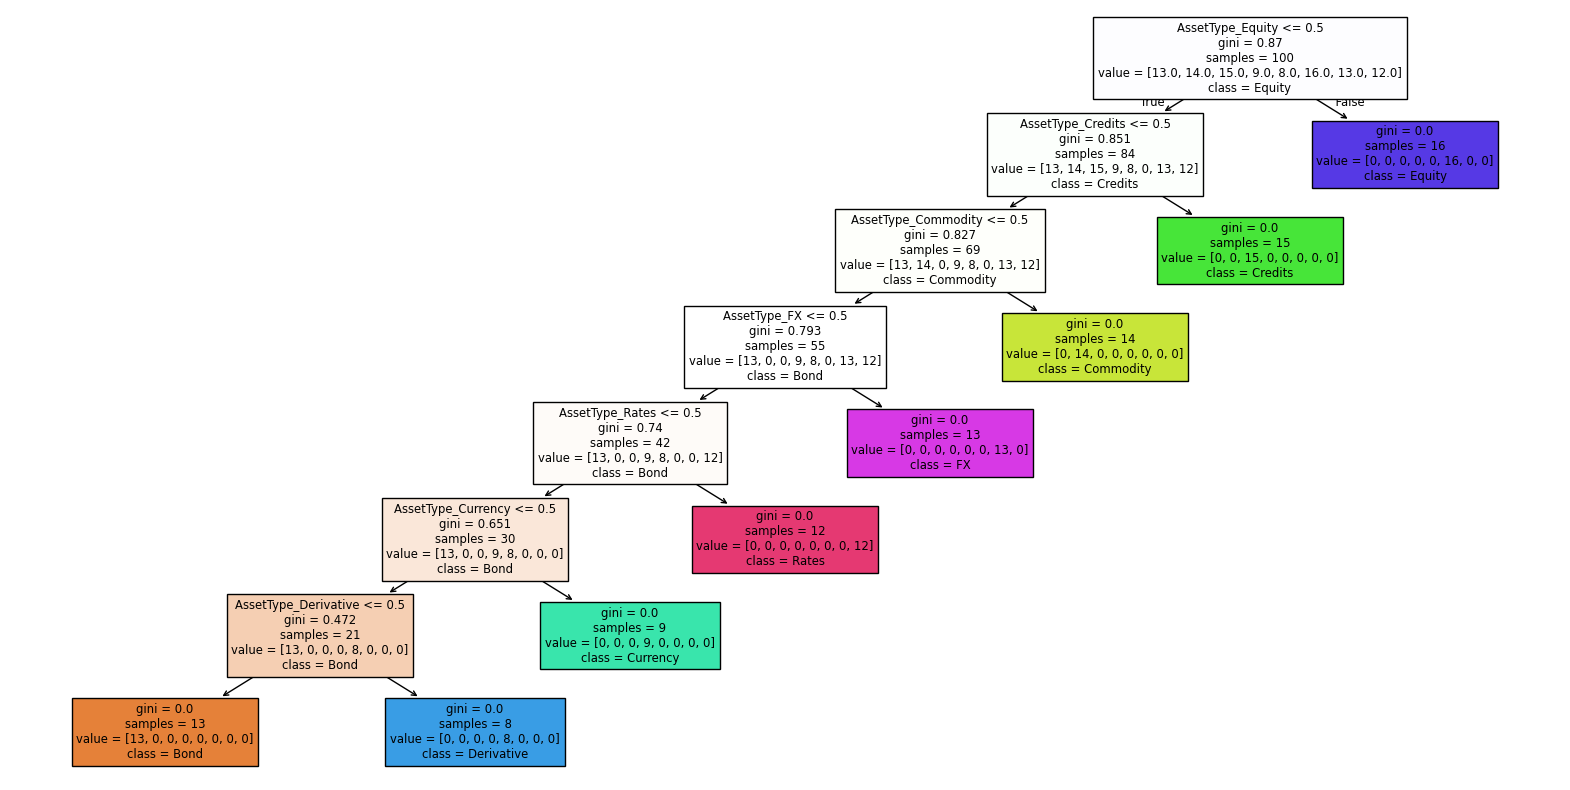

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree
from faker import Faker
from random import randint, choice
from datetime import datetime, timedelta

# Initialize Faker
fake = Faker()

# Sample data generation
trader_ids = [fake.random_number(digits=6) for _ in range(10)]
companies = [fake.company() for _ in range(10)]
buy_currencies = ['USD', 'EUR', 'JPY', 'GBP']
sell_currencies = ['EUR', 'USD', 'USD', 'USD']
market_conditions = ['Bullish', 'Bearish']
economic_indicators = ['High Growth', 'Low Growth', 'Recession']
regulatory_statuses = ['Compliant', 'Non-Compliant']
counterparty_risks = ['High', 'Medium', 'Low']

data = []
for _ in range(100):  # Generate 100 sample records
    buy_currency = choice(buy_currencies)
    sell_currency = choice(sell_currencies)
    spot_rate = round(fake.pyfloat(min_value=0.5, max_value=1.5), 4)
    forward_rate = round(spot_rate + fake.pyfloat(min_value=-0.05, max_value=0.05), 4)
    buy_sell_indicator = choice(['Buy', 'Sell'])
    quantity = round(fake.pyfloat(min_value=1000, max_value=1000000), 2)
    asset_type = choice(['Equity', 'Rates', 'Credits', 'FX', 'Commodity', 'Derivative', 'Bond', 'Currency'])
    
    data.append({
        'TransactionID': fake.unique.random_number(digits=8),
        'TradingDate': fake.date_between(start_date='-1y', end_date='today'),
        'MaturityDate': fake.date_between(start_date='today', end_date='+1y'),
        'ExecutionTime': (datetime.now()-timedelta(seconds=randint(1,86400))).strftime('%H:%M:%S'),
        'InstrumentID': fake.random_number(digits=12),
        'TraderID': choice(trader_ids),
        'BuyCurrency': buy_currency,
        'SellCurrency': sell_currency,
        'SpotRate': spot_rate,
        'ForwardRate': forward_rate,
        'BuySellIndicator': buy_sell_indicator,
        'BuyNotional': round(quantity, 2),
        'SellNotional': round(quantity * spot_rate, 2),
        'Counterparty': choice(companies),
        'Days': randint(1, 365),
        'PFE': round(fake.pyfloat(min_value=0.1, max_value=1.2), 4),
        'Volume': randint(1000, 5000),
        'RiskRating': randint(1, 5),
        'TradeType': choice(['Spot', 'Forward', 'Swap', 'Option']),
        'AssetType': asset_type,
        'MarketCondition': choice(market_conditions),
        'EconomicIndicator': choice(economic_indicators),
        'RegulatoryStatus': choice(regulatory_statuses),
        'CounterpartyRisk': choice(counterparty_risks)
    })

# Create DataFrame
df = pd.DataFrame(data)

# One-hot encode the categorical features
categorical_features = ['BuyCurrency', 'SellCurrency', 'BuySellIndicator', 'Counterparty', 'TradeType', 'AssetType', 'MarketCondition', 'EconomicIndicator', 'RegulatoryStatus', 'CounterpartyRisk']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine all features
final_features_df = pd.concat([df[['Days', 'PFE', 'Volume', 'RiskRating', 'SpotRate', 'ForwardRate', 'BuyNotional', 'SellNotional']], encoded_df], axis=1)

# Define features and target
X = final_features_df
y = df['AssetType']

# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0, max_depth=7)  # Increased depth for more complexity
tree_model.fit(X, y)

# Export the tree as text
tree_rules = export_text(tree_model, feature_names=final_features_df.columns.to_list())
print(tree_rules)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=final_features_df.columns, class_names=tree_model.classes_, filled=True)
plt.show()


Decision Tree Rules for AssetType:

|--- Counterparty_Howard, Alexander and Lewis <= 0.50
|   |--- ForwardRate <= 0.52
|   |   |--- RiskRating <= 2.00
|   |   |   |--- class: Credits
|   |   |--- RiskRating >  2.00
|   |   |   |--- class: Bond
|   |--- ForwardRate >  0.52
|   |   |--- SpotRate <= 0.82
|   |   |   |--- Days <= 327.50
|   |   |   |   |--- BuySellIndicator_Sell <= 0.50
|   |   |   |   |   |--- class: Commodity
|   |   |   |   |--- BuySellIndicator_Sell >  0.50
|   |   |   |   |   |--- class: FX
|   |   |   |--- Days >  327.50
|   |   |   |   |--- class: Rates
|   |   |--- SpotRate >  0.82
|   |   |   |--- Counterparty_Gardner and Sons <= 0.50
|   |   |   |   |--- Days <= 230.00
|   |   |   |   |   |--- class: Credits
|   |   |   |   |--- Days >  230.00
|   |   |   |   |   |--- class: Derivative
|   |   |   |--- Counterparty_Gardner and Sons >  0.50
|   |   |   |   |--- RegulatoryStatus_Non-Compliant <= 0.50
|   |   |   |   |   |--- class: Rates
|   |   |   |   |--- Regula

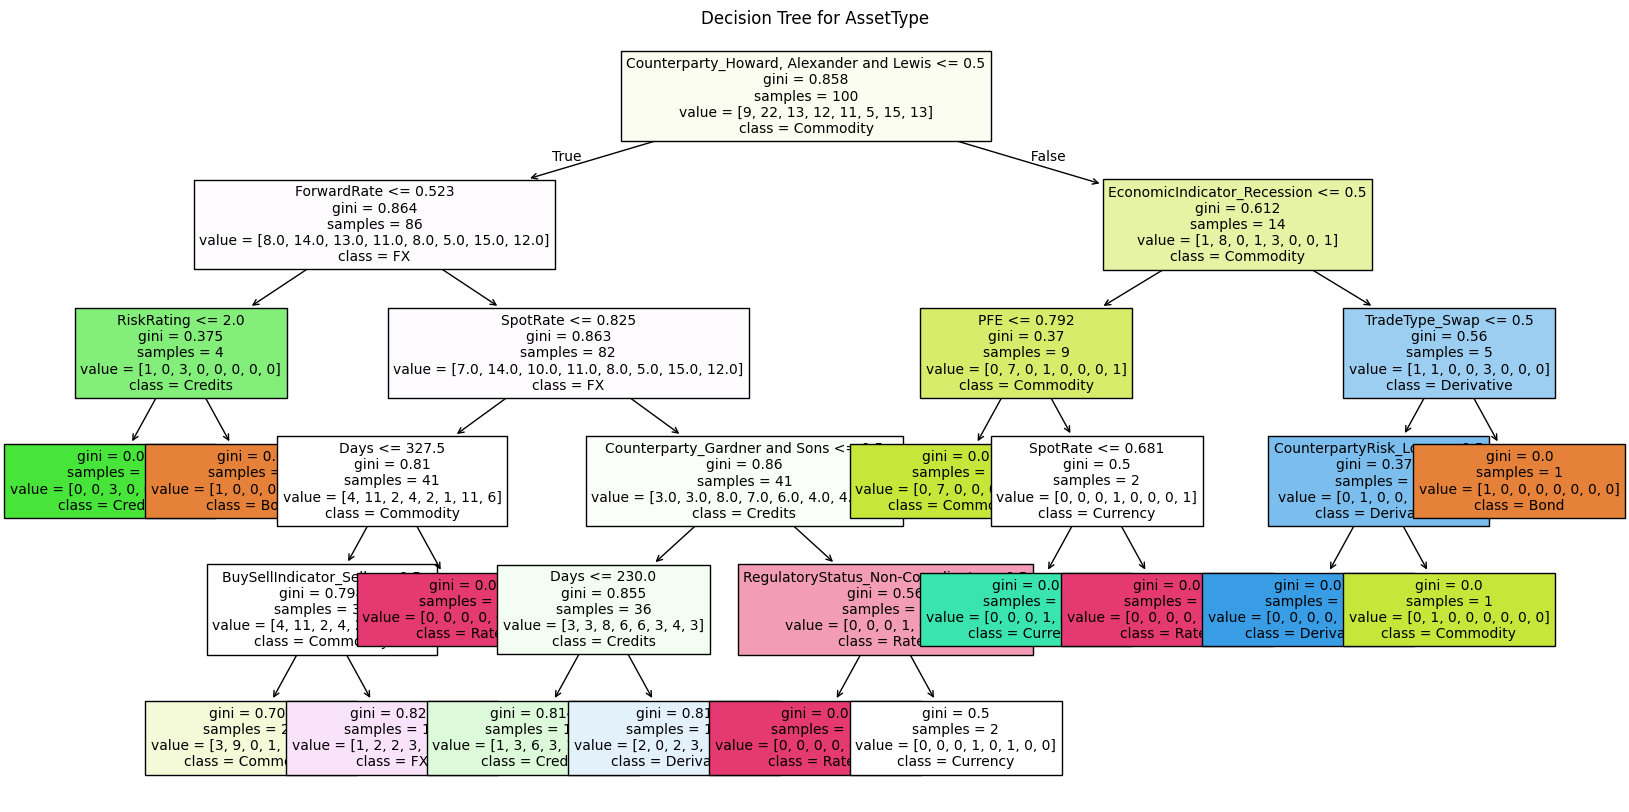

Decision Tree Rules for MarketCondition:

|--- MarketCondition_Bullish <= 0.50
|   |--- class: Bearish
|--- MarketCondition_Bullish >  0.50
|   |--- class: Bullish



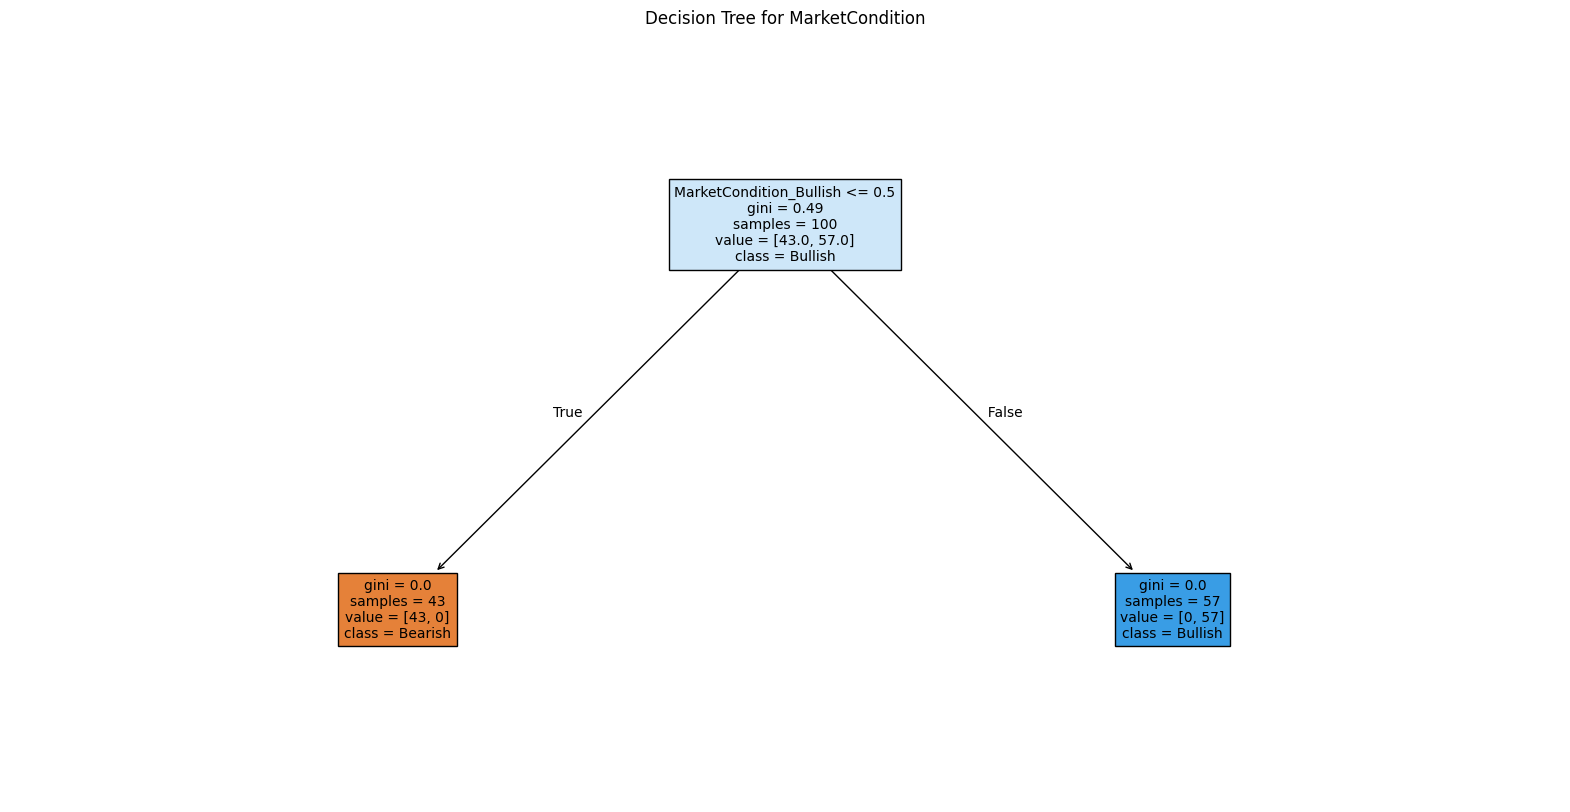

Decision Tree Rules for EconomicIndicator:

|--- EconomicIndicator_Low Growth <= 0.50
|   |--- EconomicIndicator_Recession <= 0.50
|   |   |--- class: High Growth
|   |--- EconomicIndicator_Recession >  0.50
|   |   |--- class: Recession
|--- EconomicIndicator_Low Growth >  0.50
|   |--- class: Low Growth



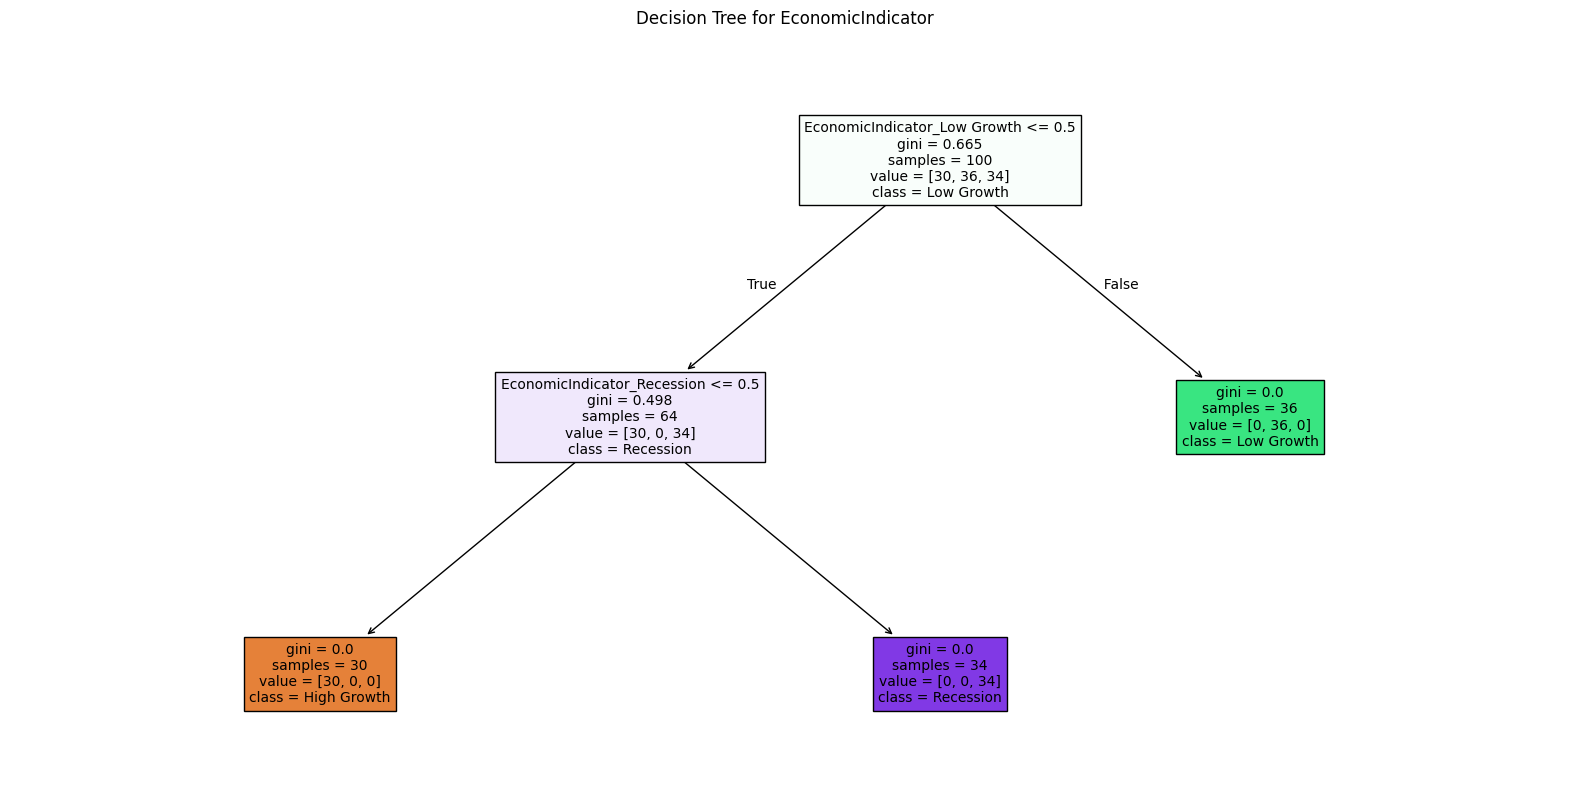

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree
from faker import Faker
from random import randint, choice
from datetime import datetime, timedelta

# Initialize Faker
fake = Faker()

# Sample data generation
trader_ids = [fake.random_number(digits=6) for _ in range(10)]
companies = [fake.company() for _ in range(10)]
buy_currencies = ['USD', 'EUR', 'JPY', 'GBP']
sell_currencies = ['EUR', 'USD', 'USD', 'USD']
market_conditions = ['Bullish', 'Bearish']
economic_indicators = ['High Growth', 'Low Growth', 'Recession']
regulatory_statuses = ['Compliant', 'Non-Compliant']
counterparty_risks = ['High', 'Medium', 'Low']

data = []
for _ in range(100):  # Generate 100 sample records
    buy_currency = choice(buy_currencies)
    sell_currency = choice(sell_currencies)
    spot_rate = round(fake.pyfloat(min_value=0.5, max_value=1.5), 4)
    forward_rate = round(spot_rate + fake.pyfloat(min_value=-0.05, max_value=0.05), 4)
    buy_sell_indicator = choice(['Buy', 'Sell'])
    quantity = round(fake.pyfloat(min_value=1000, max_value=1000000), 2)
    asset_type = choice(['Equity', 'Rates', 'Credits', 'FX', 'Commodity', 'Derivative', 'Bond', 'Currency'])
    
    data.append({
        'TransactionID': fake.unique.random_number(digits=8),
        'TradingDate': fake.date_between(start_date='-1y', end_date='today'),
        'MaturityDate': fake.date_between(start_date='today', end_date='+1y'),
        'ExecutionTime': (datetime.now()-timedelta(seconds=randint(1,86400))).strftime('%H:%M:%S'),
        'InstrumentID': fake.random_number(digits=12),
        'TraderID': choice(trader_ids),
        'BuyCurrency': buy_currency,
        'SellCurrency': sell_currency,
        'SpotRate': spot_rate,
        'ForwardRate': forward_rate,
        'BuySellIndicator': buy_sell_indicator,
        'BuyNotional': round(quantity, 2),
        'SellNotional': round(quantity * spot_rate, 2),
        'Counterparty': choice(companies),
        'Days': randint(1, 365),
        'PFE': round(fake.pyfloat(min_value=0.1, max_value=1.2), 4),
        'Volume': randint(1000, 5000),
        'RiskRating': randint(1, 5),
        'TradeType': choice(['Spot', 'Forward', 'Swap', 'Option']),
        'AssetType': asset_type,
        'MarketCondition': choice(market_conditions),
        'EconomicIndicator': choice(economic_indicators),
        'RegulatoryStatus': choice(regulatory_statuses),
        'CounterpartyRisk': choice(counterparty_risks)
    })

# Create DataFrame
df = pd.DataFrame(data)

# One-hot encode the categorical features
categorical_features = ['BuyCurrency', 'SellCurrency', 'BuySellIndicator', 'Counterparty', 'TradeType', 'MarketCondition', 'EconomicIndicator', 'RegulatoryStatus', 'CounterpartyRisk']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Combine all features
final_features_df = pd.concat([df[['Days', 'PFE', 'Volume', 'RiskRating', 'SpotRate', 'ForwardRate', 'BuyNotional', 'SellNotional']], encoded_df], axis=1)

# Define features and different targets
X = final_features_df

# Define different targets
targets = {
    'AssetType': df['AssetType'],
    'MarketCondition': df['MarketCondition'],
    'EconomicIndicator': df['EconomicIndicator']
}

# Train and visualize multiple decision trees
for target_name, y in targets.items():
    # Train a Decision Tree Classifier
    tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)
    tree_model.fit(X, y)

    # Export the tree as text
    tree_rules = export_text(tree_model, feature_names=final_features_df.columns.to_list())
    print(f"Decision Tree Rules for {target_name}:\n")
    print(tree_rules)

    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    tree.plot_tree(tree_model, feature_names=final_features_df.columns, class_names=tree_model.classes_, filled=True, fontsize=10)
    plt.title(f"Decision Tree for {target_name}")
    plt.show()
